In [1]:
import json
import logging

# Adding # noqa to a line indicates that the linter 
# (a program that automatically checks code quality) 
# should not check this line. 
# Any warnings that code may have generated will be ignored.

import hvplot.pandas  # noqa 
import polars as pl
import pandas as pd


from pydantic import BaseModel


from degiro_connector.quotecast.tools.chart_fetcher import ChartFetcher, SeriesFormatter
from degiro_connector.quotecast.models.chart import ChartRequest, Interval


In [2]:

logging.basicConfig(level=logging.INFO)

with open("../Courses/PythonExercises/config/config.json") as config_file:
    config_dict = json.load(config_file)


In [3]:

# FETCH CHART
user_token = config_dict.get("user_token")  # HERE GOES YOUR USER_TOKEN
chart_fetcher = ChartFetcher(user_token=user_token)
chart_request = ChartRequest(
    culture="fr-FR",
    # override={
    #     "resolution": "P1D",
    #     "period": "P1W",
    # },
    period=Interval.P1Y,
    requestid="1",
    resolution=Interval.PT60M,
    series=[
        "issueid:360148977",
        "price:issueid:360148977",
        "ohlc:issueid:360148977",
        "volume:issueid:360148977",
        # "vwdkey:AAPL.BATS,E",
        # "price:vwdkey:AAPL.BATS,E",
        # "ohlc:vwdkey:AAPL.BATS,E",
        # "volume:vwdkey:AAPL.BATS,E",
    ],
    tz="Europe/Paris",
)
chart = chart_fetcher.get_chart(
    chart_request=chart_request,
    raw=False,
)


In [4]:

print("first table")
if isinstance(chart, BaseModel):
    for series in chart.series:
        print(pl.DataFrame(data=series.data, orient="row"))

print("second table")
if isinstance(chart, dict):
    print(chart)


first table
shape: (1, 43)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ issueId   ┆ companyId ┆ name      ┆ identifie ┆ … ┆ windowOpe ┆ windowPre ┆ windowPre ┆ windowTr │
│ ---       ┆ ---       ┆ ---       ┆ r         ┆   ┆ nPrice    ┆ viousClos ┆ viousClos ┆ end      │
│ i64       ┆ i64       ┆ str       ┆ ---       ┆   ┆ ---       ┆ eTime     ┆ ePrice    ┆ ---      │
│           ┆           ┆           ┆ str       ┆   ┆ f64       ┆ ---       ┆ ---       ┆ f64      │
│           ┆           ┆           ┆           ┆   ┆           ┆ null      ┆ null      ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 360148977 ┆ 9245      ┆ Crédit    ┆ issueid:3 ┆ … ┆ 15.52     ┆ null      ┆ null      ┆ 0.01165  │
│           ┆           ┆ Agricole  ┆ 60148977  ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────

In [8]:

print("third table - formatted with names")
if chart:
    for series in chart.series:
        if series.times is None or series.type not in ["time", "ohlc"]:
            print("this part of the data is an ",series.type,", sorry cannot print")
        else :
            df = SeriesFormatter.format(series=series)
            print(df)
            print(type(df))
            if series.id.startswith("ohlc"):
                dfPd = df.to_pandas()
                print(dfPd)
            # dfPd.plot.line(x="timestamp")
            # df_formatted = pl.DataFrame(df)
            # print(type(df_formatted))
            


third table - formatted with names
this part of the data is an  object , sorry cannot print
shape: (887, 2)
┌────────────────────────────┬────────┐
│ timestamp                  ┆ price  │
│ ---                        ┆ ---    │
│ datetime[μs]               ┆ f64    │
╞════════════════════════════╪════════╡
│ 2023-05-15 09:00:00        ┆ 11.776 │
│ 2023-05-15 09:00:00        ┆ 11.814 │
│ 2023-05-15 10:58:58.799999 ┆ 11.706 │
│ 2023-05-15 11:58:58.799999 ┆ 11.724 │
│ 2023-05-15 12:58:58.799999 ┆ 11.724 │
│ …                          ┆ …      │
│ 2024-05-10 09:00:00        ┆ 15.5   │
│ 2024-05-10 09:00:00        ┆ 15.53  │
│ 2024-05-10 14:51:00        ┆ 15.42  │
│ 2024-05-13 09:00:00        ┆ 15.52  │
│ 2024-05-13 10:32:59.999999 ┆ 15.685 │
└────────────────────────────┴────────┘
<class 'polars.dataframe.frame.DataFrame'>
shape: (399, 5)
┌─────────────────────┬────────┬────────┬────────┬────────┐
│ timestamp           ┆ open   ┆ high   ┆ low    ┆ close  │
│ ---                 ┆ ---    ┆ 

<Axes: xlabel='timestamp'>

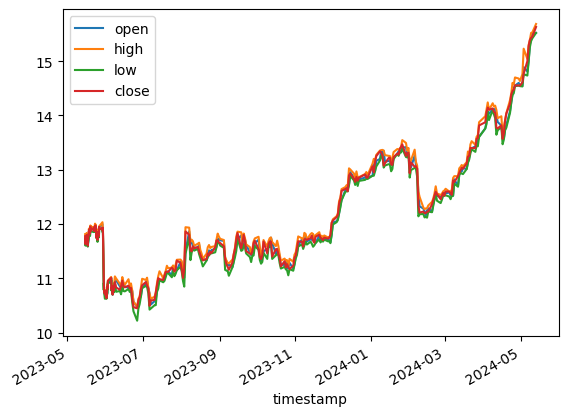

In [9]:
dfPd.plot.line(x="timestamp")

In [10]:
dfPd.hvplot.line(x="timestamp")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)